In [1]:
#Importing the libraries required
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

from glob import glob
import matplotlib.pyplot as plt

2023-06-05 16:56:17.332742: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:56:17.422385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:56:17.423460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 16:56:18.836514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import PIL

In [3]:
#setting the Train dataset and test dataset path in the folder
train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
#Setting the image size of all the input images supported for Resnet50 model
IMAGE_SIZE = [224, 224]

In [5]:
'''Importing the resnet model We do not include the top, 
because that is what we want to train ourselves. 
We only load convolutional weights that are trained on ImageNet data. 
After loading the model the layers are set “not trainable”, thus frozen.'''
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-06-05 16:56:20.520439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-05 16:56:20.521070: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
resnet

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
#Getting the number of Output classes
folders = glob('Datasets/Train/*')

In [9]:
print(folders)

['Datasets/Train/Ferrari', 'Datasets/Train/Bentley', 'Datasets/Train/Mercedes', 'Datasets/Train/Lamborghini']


In [10]:
#Flattening the layers
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
#Model creation  .Taking the resnet input shape and output as required to classify into 4 classes instead of 1000.
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
#Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
#Compiling the model with cost and optimization method and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
#Using the ImageDataGenerator for data augmentation process in training images only (Not testing )
#Scaling of training and testing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 159 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 46 images belonging to 4 classes.


In [18]:
#Fitting the model 
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
  )

Epoch 1/50


2023-06-05 16:56:23.563161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-05 16:56:26.494182: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-06-05 16:56:26.587058: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-06-05 16:56:26.632133: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106463232 exceeds 10% of free system memory.
2023-06-05 16:56:26.672624: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-06-05 16:56:26.717457: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 1

5/5 [==============================] - ETA: 0s - loss: 5.4180 - accuracy: 0.2516

2023-06-05 16:56:35.546828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 15s 3s/step - loss: 5.4180 - accuracy: 0.2516 - val_loss: 3.5431 - val_accuracy: 0.2391
Epoch 2/50
5/5 [==============================] - 12s 2s/step - loss: 2.9511 - accuracy: 0.3459 - val_loss: 3.5317 - val_accuracy: 0.3043
Epoch 3/50
5/5 [==============================] - 12s 2s/step - loss: 3.3277 - accuracy: 0.2453 - val_loss: 3.4145 - val_accuracy: 0.2391
Epoch 4/50
5/5 [==============================] - 12s 2s/step - loss: 2.5242 - accuracy: 0.3774 - val_loss: 2.5392 - val_accuracy: 0.2826
Epoch 5/50
5/5 [==============================] - 12s 2s/step - loss: 2.0071 - accuracy: 0.3836 - val_loss: 2.2920 - val_accuracy: 0.3261
Epoch 6/50
5/5 [==============================] - 12s 2s/step - loss: 1.5665 - accuracy: 0.3648 - val_loss: 1.6554 - val_accuracy: 0.3696
Epoch 7/50
5/5 [==============================] - 12s 2s/step - loss: 1.3782 - accuracy: 0.4654 - val_loss: 1.7835 - val_accuracy: 0.3261
Epoch 8/50
5/5 [=============================

In [19]:
tf.test.is_built_with_cuda()

True

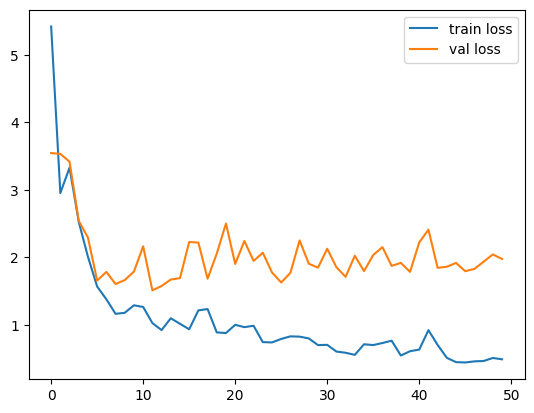

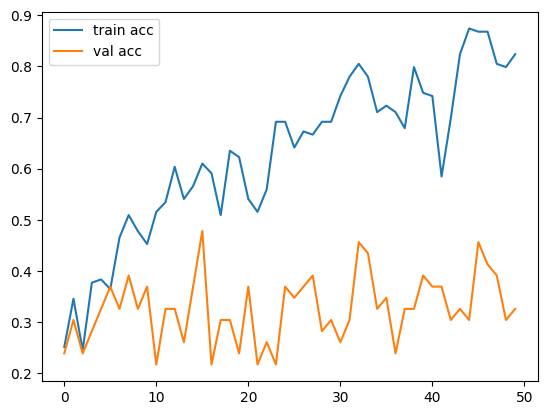

<Figure size 640x480 with 0 Axes>

In [21]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [1]:
import tensorflow as tf


2023-06-05 16:50:00.089106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:50:00.129775: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 16:50:00.130668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 16:50:00.816068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.test.is_built_with_cuda()


True

In [20]:
tf.config.list_physical_devices(
    device_type=None
)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))


Num GPUs: 1
